# Smooth Maximum

[terryさんのAHC035解説 - SpeakerDeck](https://speakerdeck.com/terryu16/ahc035jie-shuo?slide=17)で、logsumexpがAHCに使えるよとあったので調べていると[Smooth maximum - Wikipedia](https://en.wikipedia.org/wiki/Smooth_maximum)というページがあったので試してみた。

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [4]:
x = np.linspace(-20, 20, 400)

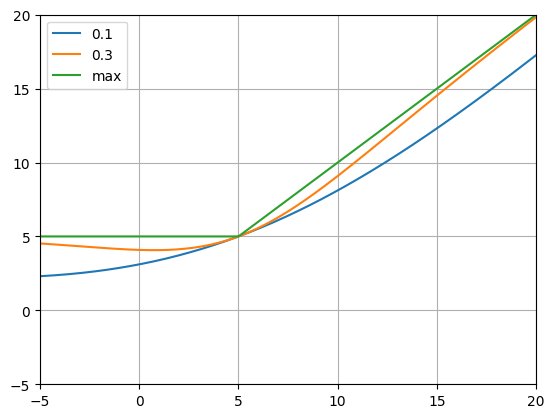

In [42]:
# Boltzmann operator

def boltzmann_op(alpha, *x):
  return sum(map(lambda t: t * math.exp(alpha * t), x)) / sum(map(lambda t: math.exp(alpha * t), x))
y0 = [boltzmann_op(0.1, t, 5) for t in x]
y1 = [boltzmann_op(0.3, t, 5) for t in x]
y2 = [max(t, 5) for t in x]
plt.plot(x, y0, label="0.1")
plt.plot(x, y1, label="0.3")
plt.plot(x, y2, label="max")
plt.xlim(-5, 20)
plt.ylim(-5, 20)
plt.legend()
plt.grid()
plt.show()

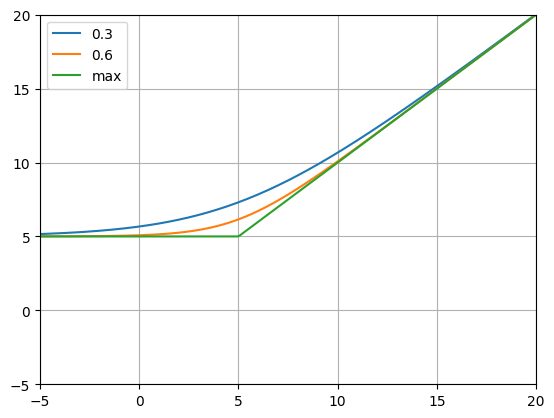

In [48]:
# LogSumExp

def logsumexp(alpha, *x):
  return math.log(sum(map(lambda t: math.exp(alpha * t), x))) / alpha
y0 = [logsumexp(0.3, t, 5) for t in x]
y1 = [logsumexp(0.6, t, 5) for t in x]
y2 = [max(t, 5) for t in x]
plt.plot(x, y0, label="0.3")
plt.plot(x, y1, label="0.6")
plt.plot(x, y2, label="max")
plt.xlim(-5, 20)
plt.ylim(-5, 20)
plt.grid()
plt.legend()
plt.show()


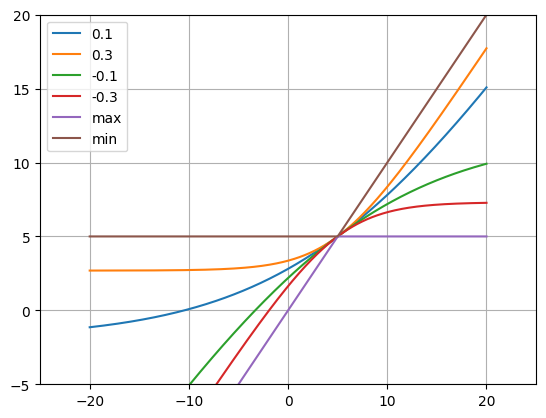

In [50]:
# Mellowmax

def mellowmax(alpha, *x):
  n = len(x)
  return math.log(sum(map(lambda t: math.exp(alpha * t), x)) / n) / alpha

y0 = [mellowmax(0.1, t, 5) for t in x]
y1 = [mellowmax(0.3, t, 5) for t in x]
y2 = [mellowmax(-0.1, t, 5) for t in x]
y3 = [mellowmax(-0.3, t, 5) for t in x]
y4 = [min(t, 5) for t in x]
y5 = [max(t, 5) for t in x]
plt.plot(x, y0, label="0.1")
plt.plot(x, y1, label="0.3")
plt.plot(x, y2, label="-0.1")
plt.plot(x, y3, label="-0.3")
plt.plot(x, y4, label="max")
plt.plot(x, y5, label="min")
plt.xlim(-25, 25)
plt.ylim(-5, 20)
plt.grid()
plt.legend()
plt.show()

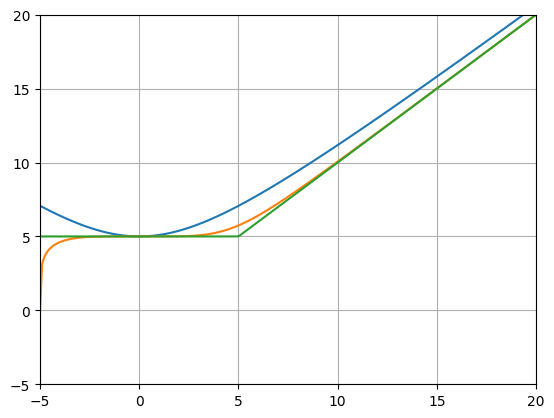

In [59]:
# p-Norm

def p_norm(p, *x):
  return sum(map(lambda t: t ** p, x)) ** (1.0 / p)
xs = np.linspace(-5, 20, 200 + 50)
y0 = [p_norm(2, t, 5) for t in xs]
y1 = [p_norm(5, t, 5) for t in xs]
y2 = [max(t, 5) for t in xs]
plt.plot(xs, y0, label="2")
plt.plot(xs, y1, label="5")
plt.plot(xs, y2, label="max")
plt.xlim(-5, 20)
plt.ylim(-5, 20)
plt.grid()
plt.show()

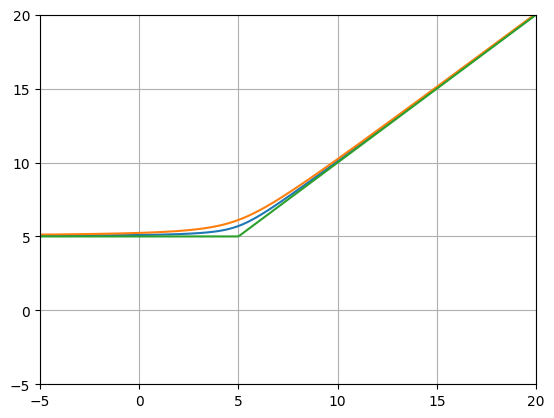

In [55]:
# Smooth maximum unit (SMU)

def smu(e, a, b):
  return (a + b + math.sqrt((a - b) * (a - b) + e)) / 2
y0 = [smu(2, t, 5) for t in x]
y1 = [smu(5, t, 5) for t in x]
y2 = [max(t, 5) for t in x]
plt.plot(x, y0, label="2")
plt.plot(x, y1, label="5")
plt.plot(x, y2, label="max")
plt.xlim(-5, 20)
plt.ylim(-5, 20)
plt.grid()
plt.show()